In [1]:
# Manipulación y procesamiento de Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Plot - Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


# Definir el tamano del grafico
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# No presentar advertencia
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("./siniestro_info_mercado_ecuador.xlsx")
data

,fecha,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias
0,2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000,933.903226,1
1,2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000,778.035714,1
2,2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000,799.516129,0
3,2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000,782.733333,1
4,2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000,670.548387,1
...,...,...,...,...,...,...,...,...
122,2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1
123,2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1
124,2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1
125,2025-06-01,102555.13100,187168.38900,0.547930,120.943609,188.859993,896.833333,0


In [3]:
# Dummy COVID (abril–dic 2020)
data["covid_dummy"] = 0
data.loc[(data["fecha"] >= np.datetime64("2020-04")) & (data["fecha"] <= np.datetime64("2020-12")), "covid_dummy"] = 1


In [4]:
data["covid_dummy"].unique()

array([0, 1], dtype=int64)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                127 non-null    datetime64[ns]
 1   costo_siniestros     127 non-null    float64       
 2   prima_nrd            127 non-null    float64       
 3   tasa_siniestralidad  127 non-null    float64       
 4   ipc_transporte       127 non-null    float64       
 5   precipitacion        127 non-null    float64       
 6   riesgo_pais          127 non-null    float64       
 7   feriados_dias        127 non-null    int64         
 8   covid_dummy          127 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 9.1 KB


In [6]:
data.describe(include= ["float"])

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,107501.865395,185720.299564,0.583553,111.421945,263.742320,1148.505515
std,60335.790260,101335.201147,0.074454,6.651050,92.285715,708.258158
min,11414.736700,21737.348400,0.370849,101.324349,100.265301,452.064516
25%,55405.010880,94108.042495,0.548030,105.947461,192.714233,711.998387
50%,102555.131000,185032.355380,0.572426,108.058350,251.570000,910.548387
75%,152936.097860,272760.862140,0.622095,119.097500,323.205000,1336.790323
max,254135.702000,378035.360100,0.741119,123.161211,506.020000,5075.107143


In [7]:
data.columns

Index(['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

In [8]:
dark_style = {
    'axes.facecolor': "#AB915E", # '#484366'  '#008080' "#abc9ea","#98daa7" ,"#f3aba8"  ,"#d3c3f7", "#f3f3af",  "#c0ebe9"
    'axes.grid': True,}  
plt.rcParams.update(dark_style)

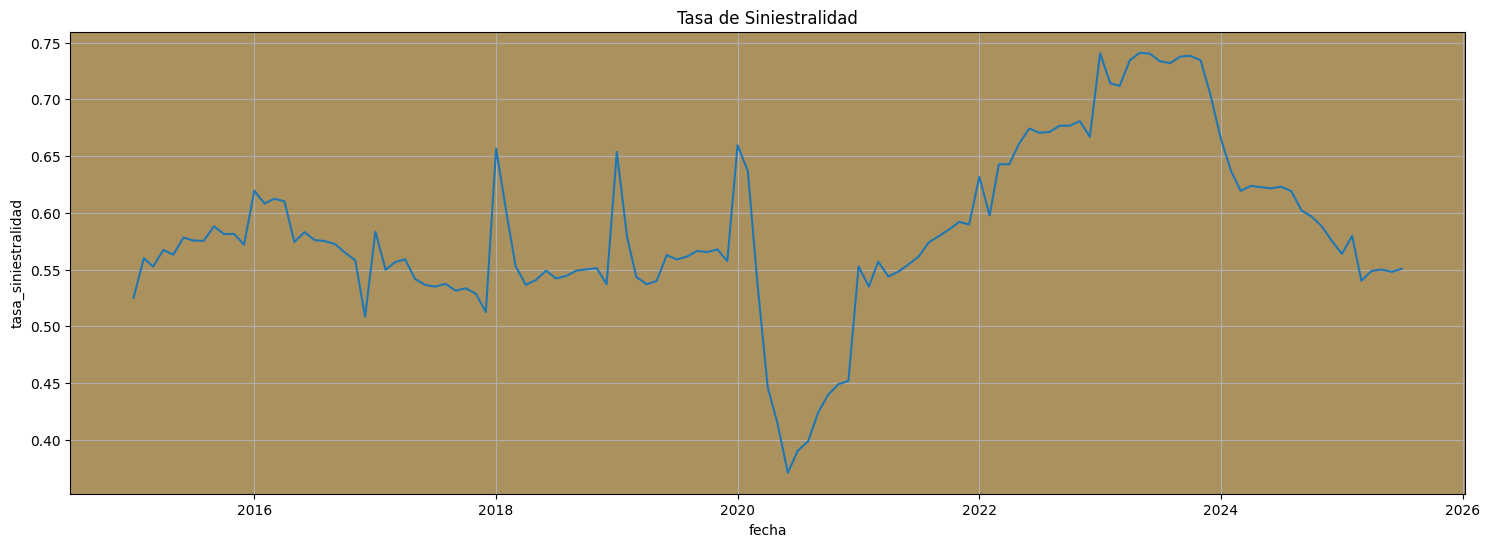

In [9]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='fecha', y = 'tasa_siniestralidad', data = data, )
plt.title('Tasa de Siniestralidad')
#plt.grid()
plt.show()

In [10]:
data['Day'] = data['fecha'].dt.day_name().astype('category')
data['Month'] = data['fecha'].dt.month_name().astype('category')

In [11]:
day_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=day_ordered, ordered=True)

month_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']

data['Month'] = pd.Categorical(data['Month'], categories=month_ordered, ordered=True)

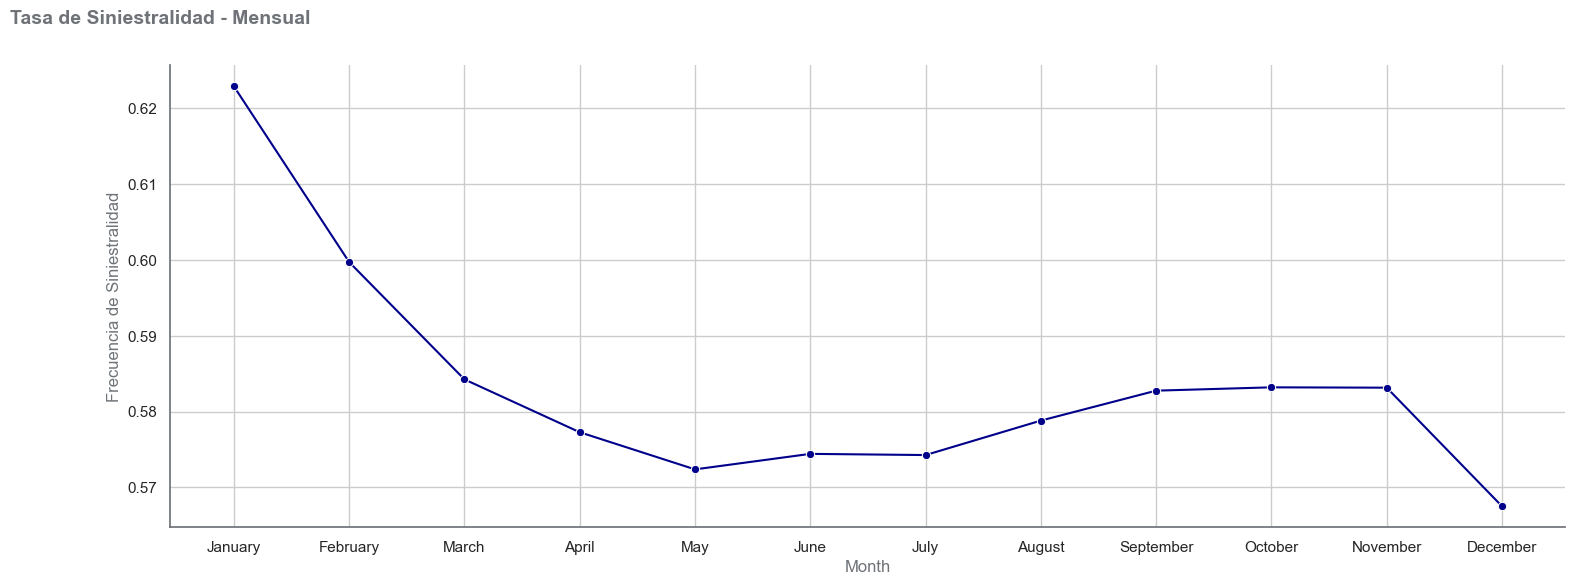

In [12]:
# Set the figure and axes
fig, ax = plt.subplots(figsize=(18,6))

# Plot the sales trend across the date
sns.lineplot(x = 'Month', y = 'tasa_siniestralidad', data = data, ci=None, marker='o', color='darkblue', ax=ax)

# Despine the right side
sns.despine(right=True)

# Set the label
ax.set_xlabel('Month', color='#6F7378')
ax.set_ylabel('Frecuencia de Siniestralidad', color='#6F7478')

# Change the spine color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Set the title
ax.set_title('Tasa de Siniestralidad - Mensual', weight='bold', pad=30, size=14, x=-0.115,
             color='#6F7378', ha='left') 

# Change tick color
ax.tick_params(color='#6F7378')

plt.show()

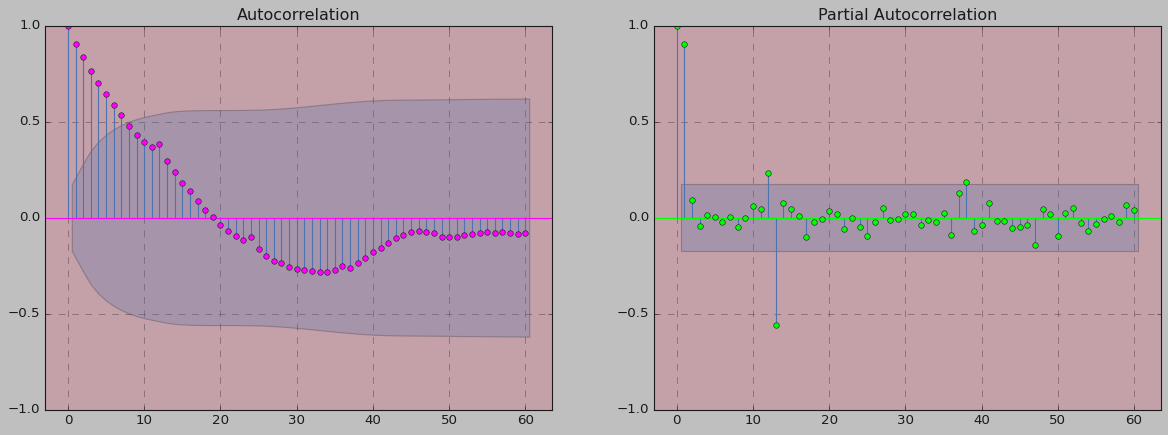

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))

# Cambiar fondo de cada subplot
for ax in axs.flat:
    ax.set_facecolor("#C4A0A9")  # color amarillo claro
    ax.grid(True, linestyle='--', alpha=0.6)  # grilla activada
    ax.set_axisbelow(True)                   # Grilla detrás de los datos

plot_acf(data["tasa_siniestralidad"],  lags = 60, ax = axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(data["tasa_siniestralidad"],  lags = 60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

Para el modelo Arima se requiere conocer si la serie es estacionaria

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Prueba Dickey Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05: # P - Values
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [31]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"],"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                         -2.134663
p-value                                 0.230807
No Lags Used                           13.000000
Número de observaciones utilizadas    113.000000
Critical Value (1%)                    -3.489590
Critical Value (5%)                    -2.887477
Critical Value (10%)                   -2.580604
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [22]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"].diff().dropna(),"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                         -2.609637
p-value                                 0.091022
No Lags Used                           12.000000
Número de observaciones utilizadas    113.000000
Critical Value (1%)                    -3.489590
Critical Value (5%)                    -2.887477
Critical Value (10%)                   -2.580604
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [23]:
Augmented_Dickey_Fuller_Test_func(data["tasa_siniestralidad"].diff().diff().dropna(),"Tasa de Siniestralidad")

Resultados de la prueba de Dickey-Fuller para columna: Tasa de Siniestralidad
Test Statistic                       -5.747776e+00
p-value                               6.064922e-07
No Lags Used                          1.100000e+01
Número de observaciones utilizadas    1.130000e+02
Critical Value (1%)                  -3.489590e+00
Critical Value (5%)                  -2.887477e+00
Critical Value (10%)                 -2.580604e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [36]:
def tsplot(y, lags=None, figsize=(18, 7), style='bmh'): # [3]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Gráfico de analisys de Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

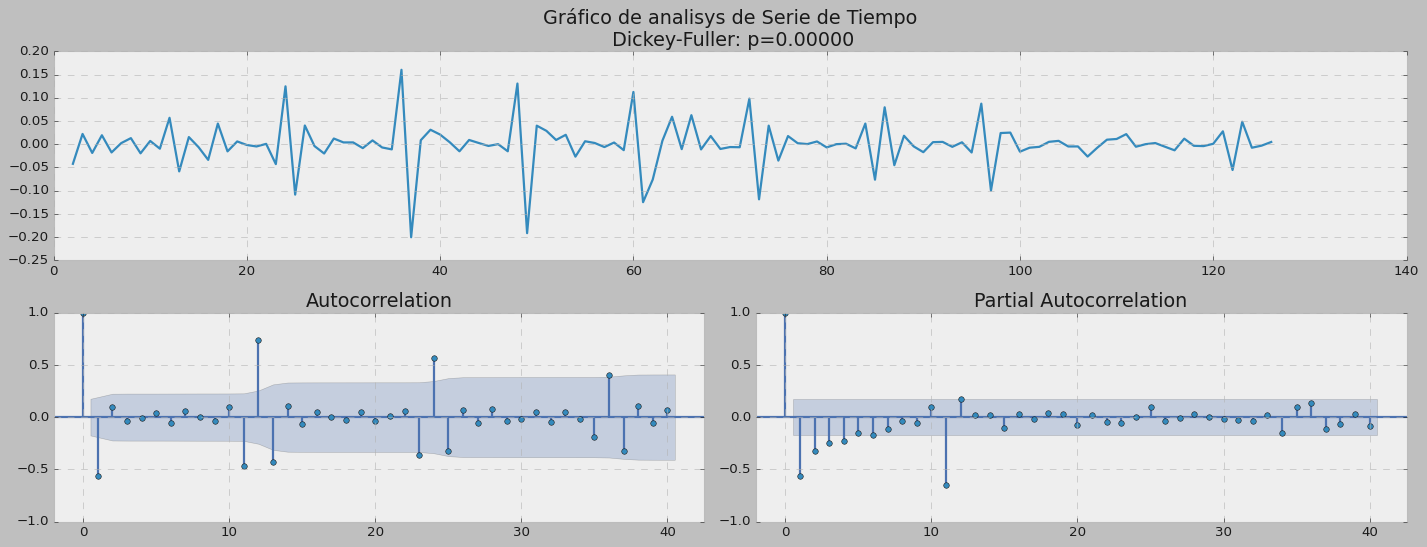

In [37]:
tsplot(data["tasa_siniestralidad"].diff().diff().dropna(), lags = 40);

## `GridSearch del Modelo ARIMA`

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Supongamos que tienes una serie temporal llamada 'y'
# y = tu_serie_temporal

# Rango de valores para p y q
p_range = range(0, 5)
q_range = range(0, 5)

# Guardar resultados
resultados = []

for p in p_range:
    for q in q_range:
        if p == 0 and q == 0:
            continue  # ARMA(0,0) no tiene sentido
        try:
            modelo = ARIMA(data["tasa_siniestralidad"], order=(p, 2, q))
            resultado = modelo.fit()
            resultados.append({
                'p': p,
                'i': 2,
                'q': q,
                'AIC': resultado.aic,
                'BIC': resultado.bic
            })
        except:
            continue

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)

In [27]:
# Ordenar por AIC
print("Top modelos por AIC:")
print(df_resultados.sort_values('AIC').head())

# Ordenar por BIC
print("\nTop modelos por BIC:")
print(df_resultados.sort_values('BIC').head())

Top modelos por AIC:
    p  i  q         AIC         BIC
12  2  2  3 -500.345976 -483.376094
13  2  2  4 -498.751024 -478.952828
6   1  2  2 -497.696031 -486.382776
0   0  2  1 -497.259647 -491.603019
5   1  2  1 -496.968482 -488.483540

Top modelos por BIC:
    p  i  q         AIC         BIC
0   0  2  1 -497.259647 -491.603019
5   1  2  1 -496.968482 -488.483540
1   0  2  2 -496.920845 -488.435904
6   1  2  2 -497.696031 -486.382776
10  2  2  1 -494.987670 -483.674415


ARIMA(p, i, q)

## Division de los Datos 

1. Datos para entrenar el modelo
2. Datos para probar el modelo.

Para los datos de prueba utilizaremos los últimos 12 meses para probar y evaluar el rendimiento de nuestro modelo.

In [39]:
sini = data[['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad','ipc_transporte', 'precipitacion']]
sini = sini.set_index('fecha')
sini

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion
fecha,,,,,
2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000
2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000
2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000
2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000
2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000
...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194


In [40]:
train = sini[sini.index<= '2024-07-01'] 
test = sini[sini.index>'2024-07-01'] 

train.shape, test.shape

((115, 5), (12, 5))

In [41]:

from pmdarima import auto_arima

In [42]:
# Ajustar modelo ARIMA no estacional
modelo = auto_arima(
    train["tasa_siniestralidad"],
    seasonal=False,     # 🔑 Desactiva la estacionalidad
    stepwise=True,      # Búsqueda eficiente
    suppress_warnings=True,
    trace=True           # Muestra el proceso de búsqueda
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-444.376, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-449.498, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-449.187, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-449.187, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-451.421, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-447.187, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.619 seconds


## Modelo ARIMA

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model

model_ARIMA = ARIMA(train["tasa_siniestralidad"],order = (0,1,0),)

# Entrenar el modelo
arima_fit = model_ARIMA.fit()

# Mostrar resumen del Model
print(arima_fit.summary())

                                SARIMAX Results                                
Dep. Variable:     tasa_siniestralidad   No. Observations:                  115
Model:                  ARIMA(0, 1, 0)   Log Likelihood                 226.711
Date:                 Sun, 31 Aug 2025   AIC                           -451.421
Time:                         22:00:02   BIC                           -448.685
Sample:                     01-01-2015   HQIC                          -450.311
                          - 07-01-2024                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   7.59e-05     14.446      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):               151.98
Prob(Q):                              0

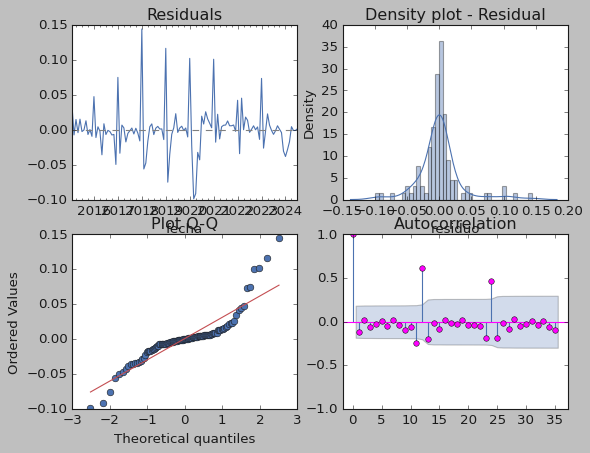

In [44]:
import scipy.stats as stats

residuales =pd.DataFrame(arima_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [45]:
test

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion
fecha,,,,,
2024-08-01,152241.817,245914.856,0.619083,123.161211,104.447962
2024-09-01,167531.291,278295.798,0.601990,122.533632,100.265301
2024-10-01,184649.523,309378.372,0.596840,121.737019,139.942870
2024-11-01,200293.016,340501.920,0.588229,121.382277,153.769579
2024-12-01,213965.725,371764.424,0.575541,122.002070,201.492260
2025-01-01,17765.108,31512.543,0.563747,121.610549,196.001572
2025-02-01,36094.024,62261.270,0.579719,122.130957,397.075158
2025-03-01,49969.934,92521.398,0.540091,122.304846,397.531894
2025-04-01,67912.024,123740.864,0.548825,121.578018,370.660651


In [46]:
# forecast = arima.forecast(steps = 5)
forecast = arima_fit.forecast(steps = 12)
forecast

2024-08-01    0.623028
2024-09-01    0.623028
2024-10-01    0.623028
2024-11-01    0.623028
2024-12-01    0.623028
2025-01-01    0.623028
2025-02-01    0.623028
2025-03-01    0.623028
2025-04-01    0.623028
2025-05-01    0.623028
2025-06-01    0.623028
2025-07-01    0.623028
Freq: MS, Name: predicted_mean, dtype: float64

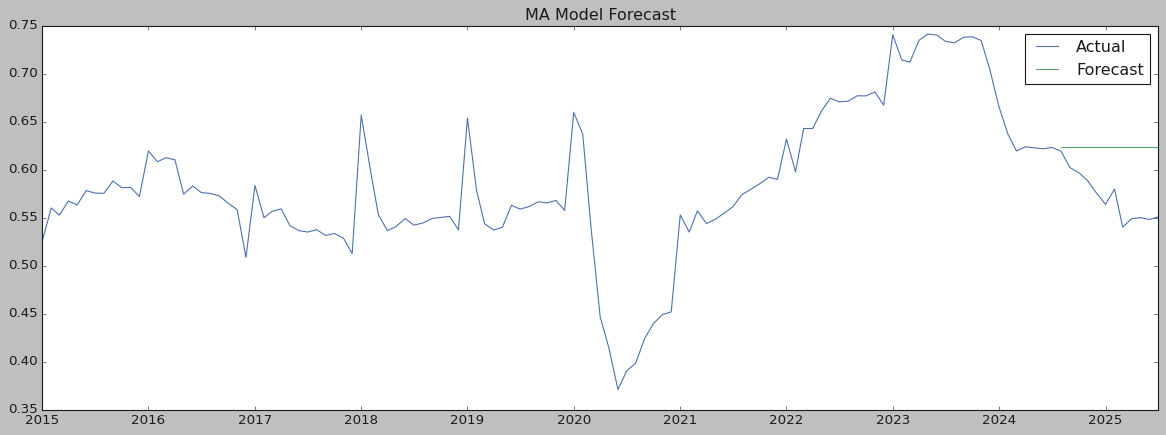

In [47]:
# plot forcasting
plt.figure(figsize=(18,6))
plt.plot(sini["tasa_siniestralidad"], label='Actual')
#plt.plot(weekly_venta_log[-90:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('MA Model Forecast')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

#  RMSE
arma_rmse1 = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], forecast))

print(f'Modelo ARIMA RMSE: {arma_rmse1*100}')

Modelo ARIMA RMSE: 5.671417027827654


## `Modelo Sarima`

In [ ]:
from pmdarima import auto_arima

# Ajustar modelo ARIMA estacional
modelo = auto_arima(
    train["tasa_siniestralidad"],
    seasonal = True,        # Activar estacionalidad
    m = 12,                 # Periodo estacional (12 para mensual)
    stepwise=True,
    trace=True,
    suppress_warnings=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-493.814, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-449.498, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-501.225, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-479.190, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-451.421, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-449.187, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=-501.300, Time=1.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-498.787, Time=1.32 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-501.130, Time=0.74 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-499.806, Time=0.45 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=-499.588, Time=1.57 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-499.505, Time=1.63 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-500.892, Time=0.85 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=-497.550, Time=1.74 sec
 ARIMA(1,1,0)(2,0,0

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model= SARIMAX(train['tasa_siniestralidad'], order = (1,1,0), seasonal_order = (2,0,0,12), )
sarima_fit = sarima_model.fit()
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                tasa_siniestralidad   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(2, 0, 0, 12)   Log Likelihood                 255.646
Date:                            Sun, 31 Aug 2025   AIC                           -503.292
Time:                                    22:01:21   BIC                           -492.347
Sample:                                01-01-2015   HQIC                          -498.850
                                     - 07-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1854      0.067      2.749      0.006       0.053       0.318
ar.S.L12       0.5368      0.060   

In [51]:
sarima_forecast = sarima_fit.forecast(steps = 12)
sarima_forecast

2024-08-01    0.623333
2024-09-01    0.627359
2024-10-01    0.627784
2024-11-01    0.626181
2024-12-01    0.607722
2025-01-01    0.597660
2025-02-01    0.578543
2025-03-01    0.568884
2025-04-01    0.574461
2025-05-01    0.574810
2025-06-01    0.574116
2025-07-01    0.573951
Freq: MS, Name: predicted_mean, dtype: float64

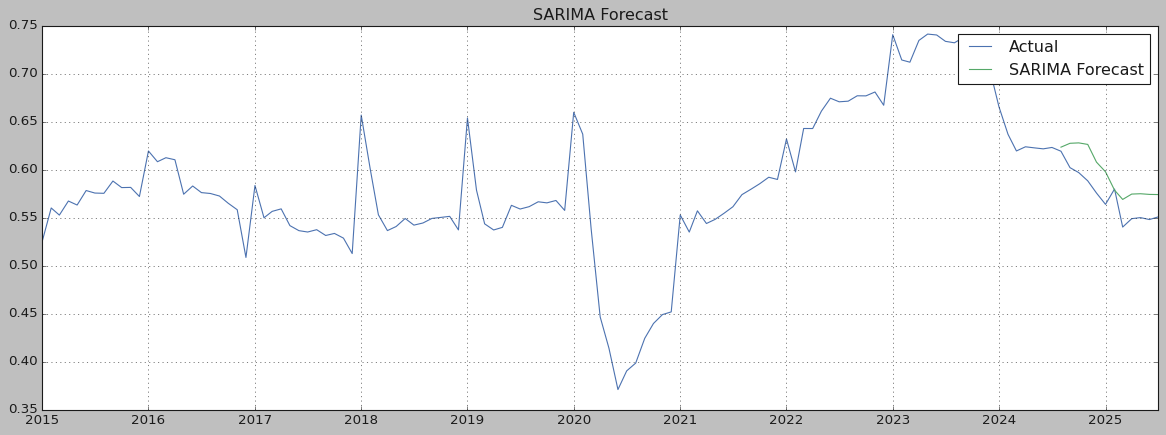

In [52]:
# plot forcast
plt.figure(figsize=(18,6))
plt.plot(sini["tasa_siniestralidad"], label='Actual')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error

#  RMSE
arima_rmse2 = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], sarima_forecast))

print(f'Modelo MA RMSE: {arima_rmse2}')

Modelo MA RMSE: 0.026736319449461407


## `Modelo SARIMAX`

In [54]:
data.columns

Index(['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy', 'Day', 'Month'],
      dtype='object')

In [55]:
sini2 = data[['fecha', 'costo_siniestros', 'prima_nrd', 'tasa_siniestralidad','ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias', 'covid_dummy']]
sini2 = sini2.set_index('fecha')
sini2

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias,covid_dummy
fecha,,,,,,,,
2015-01-01,11414.73670,21737.34840,0.525121,101.324349,304.830000,933.903226,1,0
2015-02-01,23993.22800,42846.63945,0.559979,102.423237,251.570000,778.035714,1,0
2015-03-01,36434.26000,65937.44000,0.552558,102.965220,400.650000,799.516129,0,0
2015-04-01,51390.63183,90600.17140,0.567224,104.718928,386.070000,782.733333,1,0
2015-05-01,65844.30084,116942.80600,0.563047,104.820214,352.840000,670.548387,1,0
...,...,...,...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1,0
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1,0
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1,0


In [56]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

### `Interpretación del VIF`

El VIF indica cuánto aumenta la varianza de un coeficiente de regresión debido a la correlación 

con otras variables predictoras. Los umbrales comunes son:

$$\text{VIF}_j = \frac{1}{1 - R_{j}^2} $$

- VIF < 5: Sin multicolinealidad significativa.

- 5 < VIF < 10: Multicolinealidad moderada, tolerable en algunos casos.

- VIF > 10: Multicolinealidad alta, problemática para modelos lineales.


In [57]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy'],
      dtype='object')

In [58]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suponiendo tus datos imputados (data_imputed del código anterior)
reduced_vars = [
'prima_nrd', 'covid_dummy',
 'precipitacion', 'riesgo_pais', 'feriados_dias',
]
X_reduced = sini2[reduced_vars]

vif_reduced = pd.DataFrame()
vif_reduced['Variable'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

print("VIF con variables reducidas:")
print(vif_reduced)

VIF con variables reducidas:
        Variable       VIF
0      prima_nrd  2.812603
1    covid_dummy  1.526685
2  precipitacion  4.397568
3    riesgo_pais  4.326118
4  feriados_dias  3.052864


#### `Agregar rezagos`

In [59]:
num_lags = 5
for lag in range(1, num_lags + 1):
    sini2[f'lag{lag}'] = sini2['costo_siniestros'].shift(lag)

#sini2.dropna(inplace = True)


### `Agregar promedios moviles`

In [60]:
# Lista de tamaños de ventana
windows = [2, 3, 4]

# Calcular promedios móviles para cada tamaño de ventana
for window in windows:
    sini2[f'moving_average_{window}'] = sini2['tasa_siniestralidad'].rolling(window=window).mean()

sini2.dropna(inplace = True)

# Mostrar el DataFrame con los promedios móviles
sini2

,costo_siniestros,prima_nrd,tasa_siniestralidad,ipc_transporte,precipitacion,riesgo_pais,feriados_dias,covid_dummy,lag1,lag2,lag3,lag4,lag5,moving_average_2,moving_average_3,moving_average_4
fecha,,,,,,,,,,,,,,,,
2015-06-01,83036.26387,143623.61610,0.578152,105.747636,278.020000,776.533333,0,0,65844.30084,51390.63183,36434.26000,23993.22800,11414.73670,0.570599,0.569474,0.565245
2015-07-01,98594.82518,171312.58197,0.575526,105.208120,273.590000,899.903226,0,0,83036.26387,65844.30084,51390.63183,36434.26000,23993.22800,0.576839,0.572242,0.570987
2015-08-01,115092.52825,200072.68660,0.575254,105.388957,165.800000,1163.806452,1,0,98594.82518,83036.26387,65844.30084,51390.63183,36434.26000,0.575390,0.576310,0.572995
2015-09-01,133338.83454,226748.35339,0.588048,105.656150,141.760000,1342.300000,0,0,115092.52825,98594.82518,83036.26387,65844.30084,51390.63183,0.581651,0.579609,0.579245
2015-10-01,149738.11301,257628.78179,0.581217,105.639544,252.510000,1334.193548,1,0,133338.83454,115092.52825,98594.82518,83036.26387,65844.30084,0.584632,0.581506,0.580011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,49969.93400,92521.39800,0.540091,122.304846,397.531894,1502.129032,1,0,36094.02400,17765.10800,213965.72500,200293.01600,184649.52300,0.559905,0.561185,0.564774
2025-04-01,67912.02400,123740.86400,0.548825,121.578018,370.660651,1418.900000,1,0,49969.93400,36094.02400,17765.10800,213965.72500,200293.01600,0.544458,0.556211,0.558095
2025-05-01,85451.24200,155381.01000,0.549946,120.813767,214.381194,1083.451613,1,0,67912.02400,49969.93400,36094.02400,17765.10800,213965.72500,0.549386,0.546287,0.554645


In [61]:
train2 = sini2[sini2.index<= '2024-07-01'] 
test2 = sini2[sini2.index>'2024-07-01'] 

train2.shape, test2.shape

((110, 16), (12, 16))

In [62]:
sini2.columns

Index(['costo_siniestros', 'prima_nrd', 'tasa_siniestralidad',
       'ipc_transporte', 'precipitacion', 'riesgo_pais', 'feriados_dias',
       'covid_dummy', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'moving_average_2', 'moving_average_3', 'moving_average_4'],
      dtype='object')

'costo_siniestros', 'lag1',  'moving_average_2',

In [63]:
sarimax_model = SARIMAX(train2['tasa_siniestralidad'], 
                       exog = train2[['costo_siniestros', 'precipitacion', 'riesgo_pais','moving_average_2', 'lag1', 'moving_average_3', 'moving_average_4']], # variable exogena
                        order = (0,1,1),  # parte no estacional
                       seasonal_order = (0,1,0,12)) # SMA(12) con periodo 52



# Entrenar el modelo
sarimax_fit = sarimax_model.fit()

# Mostrar el resumen del Modelo

print(sarimax_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 tasa_siniestralidad   No. Observations:                  110
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 294.217
Date:                             Sun, 31 Aug 2025   AIC                           -570.433
Time:                                     22:02:31   BIC                           -547.261
Sample:                                 06-01-2015   HQIC                          -561.064
                                      - 07-01-2024                                         
Covariance Type:                               opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
costo_siniestros  3.562e-07   9.78e-08      3.641      0.000    1.64e-07    5.48e-07
precipita

prima_nrd', 'precipitacion', 'lag1', 'moving_average_2',

In [64]:
# Forecast
#sarmax_pred = sarma_fit.forecast(steps=len(test), exog = test[["checkout_price", 'base_price']])
sarimax_pred = sarimax_fit.predict(start = "2024-08-01", end = "2025-07-01" , 
                                   exog = test2[['costo_siniestros', 'precipitacion', 'riesgo_pais',  'moving_average_2', 'lag1', 'moving_average_3', 'moving_average_4']])
sarimax_pred

2024-08-01    0.625467
2024-09-01    0.616238
2024-10-01    0.602582
2024-11-01    0.597414
2024-12-01    0.574985
2025-01-01    0.578795
2025-02-01    0.571808
2025-03-01    0.563922
2025-04-01    0.554134
2025-05-01    0.550982
2025-06-01    0.550738
2025-07-01    0.557105
Freq: MS, Name: predicted_mean, dtype: float64

In [65]:
from sklearn.metrics import mean_absolute_percentage_error

In [66]:
sarimax_rmse = np.sqrt(mean_squared_error(test['tasa_siniestralidad'], sarimax_pred))
print(f'SARIMAX RMSE: {sarimax_rmse}')

SARIMAX RMSE: 0.010394888802088591


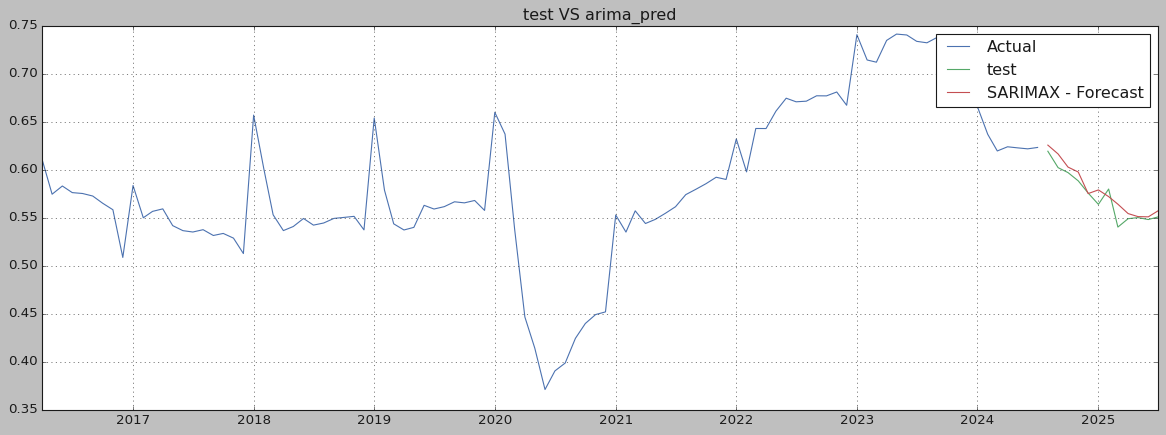

In [68]:
plt.figure(figsize=(18,6))
plt.plot(train['tasa_siniestralidad'][-100:], label='Actual')
plt.plot(test['tasa_siniestralidad'], label='test')
plt.plot(sarimax_pred, label='SARIMAX - Forecast')
#plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.title('test VS arima_pred')
plt.grid()
plt.legend()
plt.show()

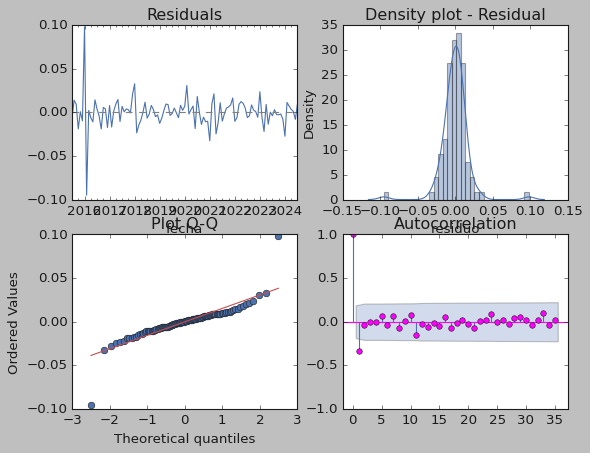

In [69]:
import scipy.stats as stats

residuales_smax =pd.DataFrame(sarimax_fit.resid.iloc[1:], columns = ["residuo"])

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residuales_smax["residuo"].plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");
axs[0,0].axhline(0, linestyle='--', color='gray')

# plot
sns.distplot(residuales_smax["residuo"], ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residuales_smax["residuo"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residuales_smax["residuo"],  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();